<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/survival-analysis-risk-regression-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6. Risk Regression

## Introduction

**Competing Risk Analysis** in survival data analysis deals with situations where individuals under study are exposed to more than one possible event that can prevent the occurrence of the primary event of interest. In such cases, a competing risk is any event that "competes" with the event of interest by either precluding its occurrence or altering the probability that it will happen.

Consider a study on patients diagnosed with a particular type of cancer. The event of interest might be cancer-specific death. However, patients can die due to other causes like heart disease, accidents, or other unrelated illnesses. These other causes are considered competing risks because they prevent cancer-specific death from occurring.

In traditional survival analysis (such as using Kaplan-Meier curves or Cox proportional hazards models), only the event of interest (e.g., death from cancer) is considered, and all other types of events are treated as censored. This can lead to biased estimates if competing risks are ignored because the assumption that censored individuals are still at risk for the event of interest is violated.

Competing risks analysis acknowledges these competing events and provides more realistic estimates of the probability of the primary event of interest.

***1. Cumulative Incidence Function (CIF)***

The **Cumulative Incidence Function (CIF)** is a statistical tool used in survival analysis to estimate the probability that a specific event (such as death from a particular cause) has occurred by a certain time in the presence of competing risks. It accounts for the fact that an individual may experience different types of events, and that the occurrence of one event type precludes the occurrence of other event types (competing risks).

In the context of **competing risks**, the CIF gives the **cumulative probability** of the event of interest over time, considering the presence of competing events.

Let’s assume that:

- $T$ is the time to the event of interest (such as death from a disease).
- $k$ is the event type (with $k = 1$ for the event of interest and $k = 2, 3, \dots$ for competing events).
- $F_k(t)$ is the CIF for event $k$.

The CIF for event $k$ at time $t$ is defined as:

$$ F_k(t) = P(T \leq t, \text{event} = k) $$

The CIF can be expressed in terms of the **cause-specific hazard function**:

$$ F_k(t) = \int_0^t \lambda_k(s) S(s) \, ds $$

Where:
- $\lambda_k(t)$ is the **cause-specific hazard** for event $k$, which represents the instantaneous risk of experiencing event $k$ at time $t$, given survival up to time $t$.
- $S(t)$ is the **overall survival function** (probability of not experiencing any event up to time $t$.

 **Cause-Specific Hazard $\lambda_k(t)$**: The rate at which the event of interest occurs at time $t$, assuming no other event has occurred before.
 **Survival Function $S(t)$**: The probability of surviving (i.e., not experiencing any event) up to time $t$.

Thus, the CIF for the event of interest (event $k$) is the sum of instantaneous risks of experiencing the event of interest, adjusted by the probability of surviving up to each point in time.

***CIF and Competing Risks***

When dealing with competing risks, the probability of an event is impacted by the possibility of experiencing other types of events (competing events). In such cases:
- The CIF explicitly considers the occurrence of competing events.
- Individuals who experience competing events are **not treated as censored** but are considered to have left the risk set for the event of interest.
  
Thus, the CIF reflects the **true probability** of experiencing the event of interest while properly accounting for competing events. It is central to **competing risk analysis** because it provides a more accurate assessment of the probability of the event of interest, compared to traditional survival analysis methods (like the Kaplan-Meier estimator), which do not account for competing risks which treats individuals who experience competing events as **censored** and can **overestimate** the probability of the event of interest. In contrast, the CIF accounts for individuals who experience competing events, and it adjusts the probability of the event of interest accordingly.

Consider a clinical study where patients are at risk of two types of events: (a) death due to cancer (event of interest). and (b) Death due to other causes (competing event). If we apply traditional Kaplan-Meier survival analysis, the patients who die from other causes would be treated as censored. This can inflate the probability of death due to cancer because the method assumes those patients could still experience cancer death if they hadn’t been censored.

Steps to calculate the CIF in Competing Risks are follow:

1. **Estimate Cause-Specific Hazards**: Calculate the cause-specific hazard $\lambda_k(t)$ for each event type. This can be done using a Cox proportional hazards model for each event type.
   
2. **Estimate the Survival Function**: Estimate the overall survival function $S(t)$ as:
   $$   S(t) = \exp\left(- \int_0^t \sum_{k=1}^{K} \lambda_k(s) \, ds \right) $$

   Where $K$ is the total number of event types (including competing events).

3. **Compute the CIF**: Use the cause-specific hazards and the survival function to compute the CIF for each event type:
   $$  F_k(t) = \int_0^t \lambda_k(s) S(s) \, ds $$

   This gives the cumulative probability of experiencing the event of interest over time, accounting for the competing risks.


***2. Cause-Specific Hazard Function***

The **cause-specific hazard function** is a key concept in survival analysis with competing risks. It measures the **instantaneous risk** of experiencing a specific event type (or cause) at a given time, assuming that the individual has not yet experienced any event. In the presence of multiple event types (competing risks), each event type has its own cause-specific hazard function.

Let $T$ represent the time to the first event (e.g., death, relapse), and let $k$ index the different event types (or causes), with $k = 1, 2, \dots, K$, where $K$ is the total number of possible event types. The **cause-specific hazard** for event type $k$ at time $t$ is defined as:

$$ \lambda_k(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T < t + \Delta t, \text{event} = k \mid T \geq t)}{\Delta t} $$


Where:
- $\lambda_k(t)$ is the cause-specific hazard function for event type $k$ at time $t$.
- $T$ is the time to the event.
- $\text{event} = k$ indicates that the event is of type $k$.
- $T \geq t$ means the individual has not yet experienced any event up to time $t$.

The **cause-specific hazard** represents the **instantaneous risk** of experiencing event type $k$ at time $t$, **given that no event of any type has occurred** up to time $t$.

***Key Characteristics:***

- **Instantaneous Risk**: The cause-specific hazard measures the rate at which individuals are experiencing event $k$ at time $t$, assuming they have survived (not experienced any event) until time $t$.
- **Competing Risks**: The cause-specific hazard focuses on the risk of a specific event, and it is computed independently of other event types.
- **Multiple Event Types**: Each event type $k$ has its own cause-specific hazard, and there can be as many cause-specific hazard functions as there are event types.

The cause-specific hazard tells us the **risk** (or hazard rate) of experiencing a particular type of event **at a given time**, under the condition that no event (including competing events) has occurred yet. This is similar to the hazard function used in standard survival analysis, but here it applies to each specific cause of failure. For example, in a study of cancer patients, the cause-specific hazard might describe the instantaneous risk of **dying from cancer** at time $t$, **given that the patient is still alive** (has not died from any cause, including non-cancer causes). The cause-specific hazard for death from cancer $\lambda_A(t)$ gives the instantaneous risk of dying from cancer at time $t$, assuming the patient is still alive (has not died from any cause) at time $t$. Similarly, the cause-specific hazard for death from other causes $\lambda_B(t)$ gives the instantaneous risk of dying from another cause at time $t$, assuming the patient has not yet died from any cause.

The **total hazard** (overall hazard) at time \(t\) can be decomposed into the sum of the cause-specific hazards for all possible event types:

$$ \lambda(t) = \sum_{k=1}^{K} \lambda_k(t) $$

Where:
- $\lambda(t)$ is the total hazard (the overall risk of experiencing any event at time $t$.
- $\lambda_k(t)$ is the cause-specific hazard for event $k$.


The **cumulative incidence function (CIF)**, which gives the probability of experiencing a specific event by time $t$, is related to the cause-specific hazard. It is therefore crucial for calculating the cumulative incidence of an event over time, especially when competing risks are present. In the context of regression analysis, cause-specific hazards can be modeled using a **Cox proportional hazards model**.

3. ***Subdistribution Hazards Function***

The **subdistribution hazard function** is an alternative to the **cause-specific hazard function** used in survival analysis when dealing with **competing risks**. It is particularly useful for modeling the probability of a specific event in the presence of competing events. Unlike the cause-specific hazard, which only considers individuals who are still at risk of any event, the subdistribution hazard keeps individuals who have experienced competing events in the risk set, treating them as still being at "risk" of the event of interest.

The subdistribution hazard is key to estimating the **cumulative incidence function (CIF)**, which gives the probability of the event of interest occurring by a given time, accounting for competing risks. The risk set for the subdistribution hazard includes individuals who have experienced competing events (but they are treated differently from those who remain at risk for the event of interest). It provides a hazard rate that adjusts for competing risks, making it suitable for **cumulative incidence-based predictions**.


Let:
- $T$ be the time to the event of interest.
- $k$ be the index for the different event types, where $k = 1$ corresponds to the event of interest, and $k = 2, 3, \dots$ represent the competing events.

The **subdistribution hazard** for event $k = 1$ at time $t$, denoted as $\lambda^{\ast}_k(t)$, is defined as:

$$ \lambda^{\ast}_1(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T < t + \Delta t, \text{event} = 1 \mid T \geq t \, \text{or competing event before} \, t)}{\Delta t} $$


Where:
- $\lambda^{\ast}_1(t)$ is the **subdistribution hazard** for the event of interest $k = 1$.
- $T \geq t \, \text{or competing event before} \, t$ means that the risk set includes individuals who are either still at risk of the event of interest or who have already experienced a competing event by time $t$.

**Fine-Gray Model and Subdistribution Hazards**

The **Fine-Gray model** is a regression model used to estimate subdistribution hazards. It allows for the estimation of the effects of covariates (such as age, treatment, etc.) on the subdistribution hazard and thus on the cumulative incidence of the event of interest.

In the Fine-Gray model, the subdistribution hazard for event $k$ given covariates $X$ is expressed as:

$$ \lambda^{\ast}_k(t \mid X) = \lambda^{\ast}_{0k}(t) \exp(\beta'X) $$

Where:
- $\lambda^{\ast}_k(t \mid X)$ is the subdistribution hazard for event $k$ at time $t$ given covariates $X$.
- $\lambda^{\ast}_{0k}(t)$ is the **baseline subdistribution hazard** for event $k$.
- $\beta$ is the vector of **regression coefficients** representing the effect of covariates on the subdistribution hazard.

This model provides a way to assess the impact of covariates on the **cumulative incidence** of the event of interest, while accounting for competing risks.

***Example of Subdistribution Hazard in Practice***

Consider a clinical study where we have two event types:
1. **Event A**: Death due to cancer (event of interest).
2. **Event B**: Death due to other causes (competing event).

In this case:
- The **cause-specific hazard** for death due to cancer reflects the instantaneous risk of dying from cancer, assuming no death from any other cause has occurred.
- The **subdistribution hazard** for death due to cancer, however, includes individuals who may have already died from other causes in the risk set, and it adjusts the hazard accordingly to reflect the true cumulative probability of cancer death over time.

 ***Step-by-Step Subdistribution Hazard Estimation***

1. **Identify the Risk Set**: The risk set includes both individuals who are still at risk for the event of interest and those who have experienced competing events.
   
2. **Estimate the Subdistribution Hazard**: Estimate the subdistribution hazard for the event of interest (e.g., death from cancer) using all individuals in the risk set, including those who have experienced competing events. This is typically done using a **Fine-Gray regression model** or by applying methods that compute the subdistribution hazard directly.

3. **Estimate the Cumulative Incidence Function (CIF)**: Use the estimated subdistribution hazard to compute the cumulative incidence function $F_1(t)$, which gives the cumulative probability of the event of interest over time, accounting for the presence of competing risks.

4. **Interpret Results**: The resulting CIF provides an accurate estimate of the probability that the event of interest will occur by time $t$, taking into account the fact that competing events might have occurred.


In practice, the **subdistribution hazard** is crucial for studies where we want to make predictions about the cumulative incidence of an event in the presence of competing risks. Unlike cause-specific hazards, which focus on the instantaneous risk of an event occurring (ignoring those who experience competing events), subdistribution hazards help us to estimate the **real-world probability** of an event, considering that some individuals may experience competing events first.

This is particularly important when making clinical decisions, estimating treatment effects, or making survival predictions in settings where multiple types of events are possible and interact with each other.


***Comparison: Cause-Specific vs. Subdistribution Hazards***

-   **Cause-Specific Hazard,** $\lambda_k(t)$: Reflects the instantaneous risk of the event of interest occurring at time $t$, assuming that no event (including competing events) has occurred by that time.
    -   It only considers individuals who are still **at risk** for all event types.
    -   It is primarily used to understand the effect of covariates on the risk of a specific event.
-   **Subdistribution Hazard,** $\lambda^{\ast}_k(t)$: Reflects the risk of the event of interest at time $t$, even including individuals who have already experienced competing events.
    -   Individuals who experience competing events are **not removed from the risk set**, although they are handled differently.
    -   It is used to directly estimate the **CIF**, which gives the cumulative probability of the event of interest over time.

### Summary of Differences:

| **Aspect**               | **Cause-Specific Hazard**                                  | **Subdistribution Hazard (Fine-Gray)**                                                      |
|--------------------------|------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Focus**                | Instantaneous risk of an event of interest                 | Accounts for competing events when modeling event of interest                               |
| **Risk Set**             | Individuals who haven’t experienced any event              | Includes individuals who have experienced competing events                                  |
| **Model Type**           | Cox proportional hazards                                   | Fine-Gray model                                                                             |
| **Cumulative Incidence** | Does not directly model cumulative incidence               | Directly linked to cumulative incidence                                                     |
| **Use Case**             | Studying the effect of covariates on each event separately | Studying the probability of experiencing an event over time in presence of competing events |



## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 792.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314951 sha256=1784aec6cd61b033991f576d582765f95133a4bd4893e1046e7046a7cec778dc
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages



In [ ]:
%%R
pkg <- c(
		 'tidyverse',
		 'report',
		 'performance',
		 'gtsummary',
		 'MASS',
		 'epiDisplay',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'riskRegression',
		 'prodlim',
		 'lava',
		 'mstate',
		 'regplot',
		 'cmprskcoxmsm'
		 )

new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')







































	‘/tmp/RtmprJ9oeo/downloaded_packages’



In [ ]:
%%R
devtools::install_github("zabore/condsurv", lib='drive/My Drive/R/')

## Cumulative Incidence Function (CIF) for competing risks without R Packages

To manually calculate the **Cumulative Incidence Function (CIF)** for a competing risk (such as death from cancer or other causes) step by step in R, we will use a synthetic dataset similar to the **Melanoma** dataset from the `{MASS}` package. This dataset will include event types, competing events, and survival times. The CIF will be computed for one specific event type, adjusting for competing risks.

*  **Generate Synthetic Data** similar to the Melanoma dataset

*  **Create Time Intervals** for survival analysis.

* **Calculate the CIF** for a specific event type (e.g., death from cancer) by following the step-by-step manual calculation approach.


### Generate Synthetic Data

We'll create a dataset with survival times, event types, and some covariates (such as age and treatment) to simulate a competing risks scenario.

In [ ]:
%%R
# Step 1: Create synthetic data
set.seed(123)
n <- 100  # number of individuals

# Generate random survival times (in years) and event types
time <- rexp(n, rate = 0.1)  # Survival time generated from exponential distribution
event_type <- sample(c(1, 2, 0), n, replace = TRUE, prob = c(0.4, 0.3, 0.3))
# event_type: 1 = death from cancer, 2 = death from other cause, 0 = censored

# Covariates: Age and treatment group (synthetic)
age <- sample(40:80, n, replace = TRUE)
treatment <- sample(c(0, 1), n, replace = TRUE)

# Create a data frame
data <- data.frame(id = 1:n, time = time, event_type = event_type, age = age, treatment = treatment)

# Display the first few rows
head(data)

  id       time event_type age treatment
1  1  8.4345726          2  49         0
2  2  5.7661027          2  52         0
3  3 13.2905487          0  50         0
4  4  0.3157736          0  64         0
5  5  0.5621098          1  65         0
6  6  3.1650122          0  46         1


This dataset has:

-   `time`: Time to event (cancer death, other cause of death, or censored),

-   `event_type`: Type of event (1 = death from cancer, 2 = death from other causes, 0 = censored),

-   `age`: Age of the individual,

-   `treatment`: Treatment group (0 = no treatment, 1 = treatment).

### Create Time Intervals

We divide the survival times into intervals for calculating the cumulative incidence over time.

In [ ]:
%%R
# Step 2: Define time intervals
time_intervals <- seq(0, max(data$time), by = 1)  # Time intervals from 0 to max time

### Calculate the Cumulative Incidence Function (CIF)

We calculate the CIF for **event type 1** (e.g., death from cancer), adjusting for competing events (event type 2, e.g., death from other causes). Here’s the step-by-step manual calculation of the CIF:

CIF calculation steps:

-   **At-Risk Set**: Count the number of individuals at risk at the beginning of each time interval.

-   **Event Occurrences**: Count the number of individuals experiencing the event of interest (event type 1) and competing events (event type 2) in each interval.

-   **Subdistribution Hazard**: Calculate the hazard for event type 1 in each interval.

-   **Cumulative Incidence**: Sum the hazards over time to estimate the cumulative incidence of the event of interest.

In [ ]:
%%R
# event 1
# Step 3: Initialize variables for CIF calculation
cif_event1 <- numeric(length(time_intervals))  # Vector to store cumulative incidence
at_risk <- numeric(length(time_intervals))  # Number of individuals at risk

# Step 4: Calculate CIF for each time interval
for (i in 2:length(time_intervals)) {
  # Individuals at risk at the start of the interval
  at_risk[i - 1] <- sum(data$time >= time_intervals[i - 1])

  # Number of events of interest (event_type = 1) in this interval
  event1_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 1 & data$time >= time_intervals[i - 1])

  # Number of competing events (event_type = 2) in this interval
  competing_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 2 & data$time >= time_intervals[i - 1])

  # Subdistribution hazard for event_type 1 (event of interest)
  hazard_event1 <- if (at_risk[i - 1] > 0) event1_in_interval / at_risk[i - 1] else 0

  # Update CIF by adding the new hazard * (1 - previous CIF)
  cif_event1[i] <- cif_event1[i - 1] + hazard_event1 * (1 - cif_event1[i - 1])
}

# Display the time intervals, number at risk, and CIF for cancer death (event_type = 1)
data.frame(time_intervals, at_risk, cif_event1)

   time_intervals at_risk cif_event1
1               0     100  0.0000000
2               1      89  0.0600000
3               2      87  0.0705618
4               3      77  0.1026114
5               4      70  0.1375746
6               5      65  0.1745357
7               6      57  0.1872351
8               7      54  0.2300122
9               8      53  0.2442713
10              9      49  0.2585303
11             10      45  0.2585303
12             11      40  0.2750074
13             12      34  0.3293818
14             13      31  0.3688300
15             14      27  0.3688300
16             15      23  0.3922066
17             16      17  0.4186324
18             17      14  0.4528305
19             18      13  0.4528305
20             19      10  0.4949205
21             20      10  0.4949205
22             21      10  0.4949205
23             22       9  0.4949205
24             23       8  0.4949205
25             24       8  0.4949205
26             25       8  0.4949205
2

In [ ]:
%%R
# event 2
# Initialize variables for CIF calculation for event type 2
cif_event2 <- numeric(length(time_intervals))  # Vector to store cumulative incidence for event 2

# Calculate CIF for event type 2 (death from other causes)
for (i in 2:length(time_intervals)) {
  # Number of individuals at risk at the start of the interval
  at_risk[i - 1] <- sum(data$time >= time_intervals[i - 1])

  # Number of events of interest (event_type = 1) in this interval
  event2_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 2 & data$time >= time_intervals[i - 1])

  # Subdistribution hazard for event_type 2 (competing event)
  hazard_event2 <- if (at_risk[i - 1] > 0) event2_in_interval / at_risk[i - 1] else 0

  # Update CIF for event type 2
  cif_event2[i] <- cif_event2[i - 1] + hazard_event2 * (1 - cif_event2[i - 1])
}

# Display CIF for both event types
data.frame(time_intervals, cif_event1, cif_event2)

   time_intervals cif_event1 cif_event2
1               0  0.0000000 0.00000000
2               1  0.0600000 0.03000000
3               2  0.0705618 0.03000000
4               3  0.1026114 0.07459770
5               4  0.1375746 0.08661591
6               5  0.1745357 0.11271260
7               6  0.1872351 0.15366433
8               7  0.2300122 0.15366433
9               8  0.2442713 0.15366433
10              9  0.2585303 0.18560152
11             10  0.2585303 0.18560152
12             11  0.2750074 0.20369927
13             12  0.3293818 0.22360678
14             13  0.3688300 0.24644188
15             14  0.3688300 0.29505853
16             15  0.3922066 0.34727642
17             16  0.4186324 0.43241428
18             17  0.4528305 0.43241428
19             18  0.4528305 0.43241428
20             19  0.4949205 0.47607472
21             20  0.4949205 0.47607472
22             21  0.4949205 0.47607472
23             22  0.4949205 0.47607472
24             23  0.4949205 0.47607472


### Plot the Cumulative Incidence Function (CIF)

Now that we have the cumulative incidence for each time interval, we can plot the CIF for death from cancer.

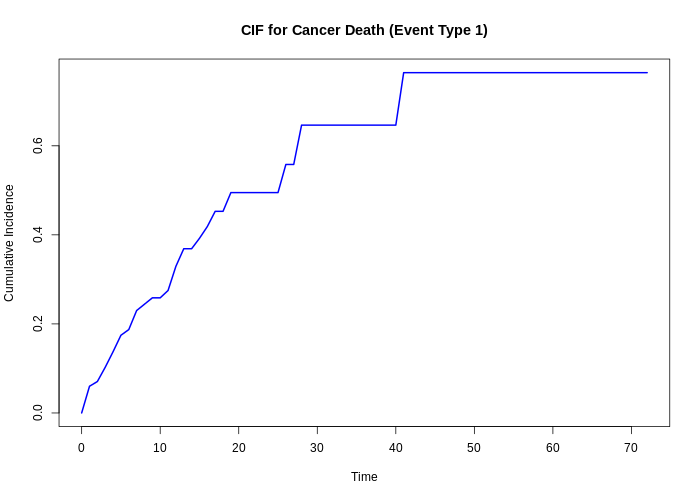

In [ ]:
%%R -h 500 -w 700 -u px
# Plot the CIF for event type 1 (death from cancer)
# Plot CIF for event type 1 (cancer death)
plot(time_intervals, cif_event1, type = "l", col = "blue", lwd = 2,
     ylab = "Cumulative Incidence", xlab = "Time",
     main = "CIF for Cancer Death (Event Type 1)")

his plot shows how the cumulative incidence of death from cancer (event type 1) increases over time, taking into account competing risks (event type 2, death from other causes).

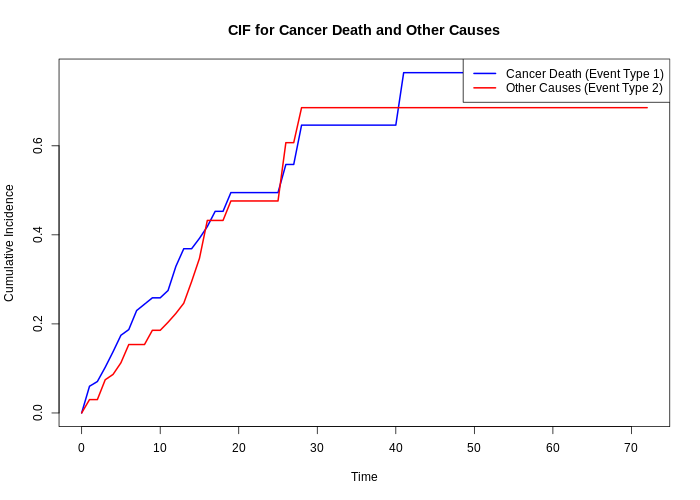

In [ ]:
%%R -h 500 -w 700 -u px
plot(time_intervals, cif_event1, type = "l", col = "blue", lwd = 2,
     ylab = "Cumulative Incidence", xlab = "Time",
     main = "CIF for Cancer Death and Other Causes",
     ylim = c(0, max(cif_event1, cif_event2)))
lines(time_intervals, cif_event2, col = "red", lwd = 2)

# Add a legend
legend("topright", legend = c("Cancer Death (Event Type 1)", "Other Causes (Event Type 2)"),
       col = c("blue", "red"), lwd = 2)

## Competing Risks Regression without Packages

Let's walk through the step-by-step manual estimation of the **subdistribution hazard** using a synthetic dataset similar to the Melanoma data from the `{MASS}` package in R. We won't use any special package for **Fine-Gray regression** or for calculating **subdistribution hazards,** but instead, we will manually create the steps to estimate the **Cumulative Incidence Function (CIF)** and the **subdistribution hazard**.

*  **Competing Risks**: One event of interest (e.g., death from cancer) and a competing event (e.g., death from another cause).

*  **Estimate the CIF** for the event of interest by using the subdistribution approach.

*  **Estimate the Subdistribution Hazard** using the synthetic data.

*  **Compare CIF and Subdistribution Hazard values across time intervals**.

### Competing Risks

We will now define the events of interest and the competing events:

-   **Event of interest**: `event_type = 1` (death from cancer).
-   **Competing event**: `event_type = 2` (death from other causes).

### Estimate the Cumulative Incidence Function (CIF)

For each event type (cause 1 and cause 2), we will estimate the **Cumulative Incidence Function (CIF)**. The CIF gives the cumulative probability of the event happening by a certain time, accounting for competing risks.




Here’s a step-by-step estimation for the **CIF** for event type 1 (cancer death)

In [ ]:
%%R
# Step 3: Create a function to calculate the CIF for event_type 1 (cancer death)

# Define time intervals
time_intervals <- seq(0, max(data$time), by = 1)  # Time intervals from 0 to max time

# Initialize CIF vector
cif_event1 <- numeric(length(time_intervals))

# Calculate risk set and CIF for event type 1
for (i in 2:length(time_intervals)) {
  # Individuals at risk at the start of the interval
  at_risk <- sum(data$time >= time_intervals[i - 1])

  # Number of events (event_type = 1) occurring in this interval
  event1_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 1 & data$time >= time_intervals[i - 1])

  # Number of competing events (event_type = 2) occurring in this interval
  competing_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 2 & data$time >= time_intervals[i - 1])

  # Estimate of subdistribution hazard for event type 1
  hazard_event1 <- event1_in_interval / at_risk

  # Update CIF (CIF is cumulative sum of the subdistribution hazards)
  cif_event1[i] <- cif_event1[i - 1] + hazard_event1 * (1 - cif_event1[i - 1])
}

# Display the CIF for cancer death (event_type = 1)
data.frame(time_intervals, cif_event1)



   time_intervals cif_event1
1               0  0.0000000
2               1  0.0600000
3               2  0.0705618
4               3  0.1026114
5               4  0.1375746
6               5  0.1745357
7               6  0.1872351
8               7  0.2300122
9               8  0.2442713
10              9  0.2585303
11             10  0.2585303
12             11  0.2750074
13             12  0.3293818
14             13  0.3688300
15             14  0.3688300
16             15  0.3922066
17             16  0.4186324
18             17  0.4528305
19             18  0.4528305
20             19  0.4949205
21             20  0.4949205
22             21  0.4949205
23             22  0.4949205
24             23  0.4949205
25             24  0.4949205
26             25  0.4949205
27             26  0.5580554
28             27  0.5580554
29             28  0.6464443
30             29  0.6464443
31             30  0.6464443
32             31  0.6464443
33             32  0.6464443
34            

This code calculates the **CIF** for event type 1 (death from cancer) across time intervals by adjusting for the competing risk of other causes of death (event type 2). The key component is that we are keeping track of individuals who are still at risk or who have experienced competing events.

### Estimate the Subdistribution Hazard

The **subdistribution hazard** function is essentially the rate of the event of interest (in this case, death from cancer) occurring, while accounting for individuals who have experienced competing events.

To estimate the **subdistribution hazard** for event type 1 (cancer death), we use the risk set and competing event data:

In [ ]:
%%R
# Step 4: Estimate Subdistribution Hazard

# Initialize subdistribution hazard vector
subhazard_event1 <- numeric(length(time_intervals))

for (i in 2:length(time_intervals)) {
  # Risk set: All individuals who have not yet had an event or have experienced a competing event
  risk_set <- sum(data$time >= time_intervals[i - 1] | (data$time < time_intervals[i] & data$event_type == 2))

  # Number of events (event_type = 1) occurring in this interval
  event1_in_interval <- sum(data$time < time_intervals[i] & data$event_type == 1 & data$time >= time_intervals[i - 1])

  # Subdistribution hazard for event type 1
  subhazard_event1[i] <- event1_in_interval / risk_set
}

# Display the subdistribution hazard
data.frame(time_intervals, subhazard_event1)

   time_intervals subhazard_event1
1               0       0.00000000
2               1       0.06000000
3               2       0.01086957
4               3       0.03333333
5               4       0.03571429
6               5       0.03846154
7               6       0.01333333
8               7       0.04285714
9               8       0.01492537
10              9       0.01515152
11             10       0.00000000
12             11       0.01666667
13             12       0.05357143
14             13       0.03921569
15             14       0.00000000
16             15       0.02127660
17             16       0.02222222
18             17       0.02380952
19             18       0.00000000
20             19       0.02631579
21             20       0.00000000
22             21       0.00000000
23             22       0.00000000
24             23       0.00000000
25             24       0.00000000
26             25       0.00000000
27             26       0.02941176
28             27   

This code calculates the subdistribution hazard for event type 1 (death from cancer), using the adjusted risk set that includes individuals who have experienced competing events.

### Compare CIF and Subdistribution Hazard

We can now plot the **CIF** and **subdistribution hazard** over time to compare them:

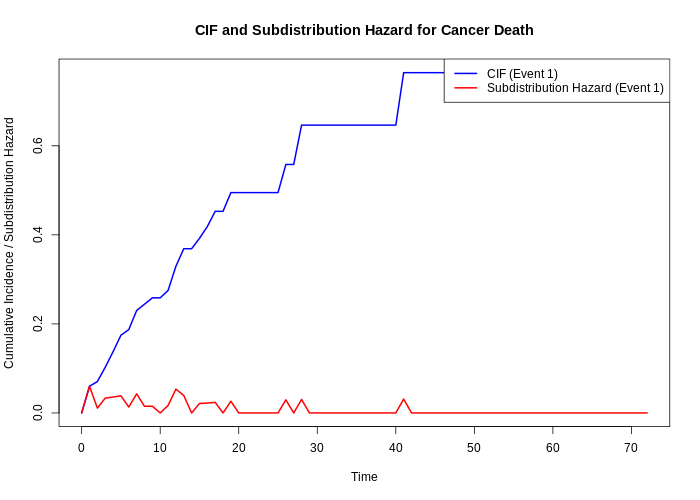

In [ ]:
%%R -h 500 -w 700 -u px
plot_data <- data.frame(time_intervals, cif_event1, subhazard_event1)

# Plot CIF and Subdistribution Hazard
plot(plot_data$time_intervals, plot_data$cif_event1, type = "l", col = "blue", lwd = 2,
     ylab = "Cumulative Incidence / Subdistribution Hazard", xlab = "Time",
     main = "CIF and Subdistribution Hazard for Cancer Death")
lines(plot_data$time_intervals, plot_data$subhazard_event1, col = "red", lwd = 2)

legend("topright", legend = c("CIF (Event 1)", "Subdistribution Hazard (Event 1)"),
       col = c("blue", "red"), lwd = 2)

This plot will show the **Cumulative Incidence Function (CIF)** and the **subdistribution hazard** for event type 1 (death from cancer) over time. The blue line represents the CIF, while the red line represents the subdistribution hazard.

This manual process provides an understanding of how the CIF and subdistribution hazard are calculated and used in competing risks analysis.


## Risk Regression with R Packages

Risk regression is commonly used in survival analysis, particularly in the presence of competing risks, to model the relationship between covariates and the cause-specific hazards or subdistribution hazards. There are several R packages that provide functionalities for risk regression, especially for competing risks and time-to-event data.

Here are some of the key R packages for risk regression:

[{riskRegression}](https://cran.r-project.org/web/packages/riskRegression/index.html): This package provides tools to compute risk regression models for time-to-event outcomes, including survival analysis and competing risks. It includes models for cause-specific hazards, subdistribution hazards (Fine-Gray model), and Cox proportional hazards regression.

[{cmprsk}](https://cran.r-project.org/web/packages/cmprsk/index.html),: This package is widely used for performing competing risks regression analysis using the Fine-Gray model (subdistribution hazard). It also provides functions for cumulative incidence estimation and testing.

[{tidycmprsk}](https://mskcc-epi-bio.github.io/tidycmprsk/): The package wraps the {cmprsk} package, and exports functions for univariate cumulative incidence estimates with `cuminc()` and competing risk regression with `crr()`

[{timereg}](https://cran.r-project.org/web/packages/timereg/index.html): This package provides methods for parametric and semi-parametric regression models, including models for survival data with competing risks. It supports cumulative incidence models, Cox regression, and additive hazards models.

Some Common Packages and their Use-Cases:

Some Common Packages and their Use-Cases:

| **Package** | **Purpose** | **Main Functions** |
|----------------|-------------------------------|-------------------------|
| {riskRegression} | Risk regression models for competing risks and survival | `FGR()`, `CSC()`, `predictRisk()`, `Score()` |
| {cmprsk} | Competing risks analysis, Fine-Gray model | `crr()`, `cuminc()`, `survfit()` |
| {survival} | General survival analysis, cause-specific hazard models | `coxph()`, `Surv()`, `survfit()` |
| {timereg} | Flexible time regression models, additive models | `comp.risk()`, `cif()`, `addreg()` |
| {tidycmprsk}  | Estimation of CIF and risk regression | `cuminc()`, `crr()` |


These packages provide a wide array of tools for analyzing competing risks and risk regression, allowing researchers to estimate hazards, cumulative incidence functions, and make predictions.

### Risk Regression with {tidycmprsk} packages

The `tidycmprsk` package is an excellent tool for performing competing risks analysis within a **tidyverse** framework. It builds on top of the `cmprsk` package and makes it easy to work with competing risks using tidy data principles.



#### Load R packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(gtsummary)
library(report)
library(performance)
library(MASS)
library(epiDisplay)
library(survival)
library(survminer)
library(ggsurvfit)
library(tidycmprsk)
library(condsurv)
library(timereg)
library(cmprsk)
library(riskRegression)


#### Data

We’ll use the **Melanoma** dataset from the `{MASS}` package to

In [ ]:
%%R
data(Melanoma, package = "MASS")
glimpse(Melanoma)

Rows: 205
Columns: 7
$ time      <int> 10, 30, 35, 99, 185, 204, 210, 232, 232, 279, 295, 355, 386,…
$ status    <int> 3, 3, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, …
$ sex       <int> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, …
$ age       <int> 76, 56, 41, 71, 52, 28, 77, 60, 49, 68, 53, 64, 68, 63, 14, …
$ year      <int> 1972, 1968, 1977, 1968, 1965, 1971, 1972, 1974, 1968, 1971, …
$ thickness <dbl> 6.76, 0.65, 1.34, 2.90, 12.08, 4.84, 5.16, 3.22, 12.88, 7.41…
$ ulcer     <int> 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


The dataset contains information such as:

-   `time` survival time in days, possibly censored.

-   `status` 1 died from melanoma, 2 alive, 3 dead from other causes

-   `sex` 1 = male, 0 = female.

-   `age` age in years.

-   `year` of operation.

-   `thickness` tumor thickness in mm.

-   `ulcer` 1 = presence, 0 = absence.

We need to preprocess the data to make it suitable for risk analysis with competing events (cancer death and death from other causes).

In [ ]:
%%R
# Create a competing risks event variable (event_type)
# 0= censored, 1= death due to melanoma and 2= death due to other causes),
Melanoma <-
  Melanoma %>%
  mutate(
    status = as.factor(recode(status, `2` = 0, `1` = 1, `3` = 2))
  )


#### Estimate Cumulative Incidence Functions (CIF)

The **Cumulative Incidence Function (CIF)** estimates the probability of each event (cancer death or other causes) over time, accounting for competing risks. We’ll compute the CIF for each event type. Estimate the CIF in the context of competing risks using the `cuminc()` function from the {tidycmprsk} package. By default this requires the status to be a factor variable with censored patients coded as 0.

Let’s examine the incidence of death from melanoma and other causes using the Melanoma dataset, specifically focusing on ulceration (`ulcer`) —whether it is present or absent.

In [ ]:
%%R
# Estimate the cumulative incidence function (CIF)
cif.fit<-tidycmprsk::cuminc(Surv(time, status) ~ ulcer, Melanoma)
# Display the summary of CIF results
cif.fit



── cuminc() ────────────────────────────────────────────────────────────────────

• Failure type "1"
strata   time    n.risk   estimate   std.error   95% CI          
0        1,000   108      0.035      0.017       0.011, 0.081    
0        2,000   66       0.103      0.030       0.054, 0.171    
0        3,000   38       0.182      0.044       0.105, 0.274    
0        4,000   9        0.182      0.044       0.105, 0.274    
0        5,000   1        0.182      0.044       0.105, 0.274    
1        1,000   63       0.244      0.046       0.161, 0.337    
1        2,000   37       0.390      0.052       0.289, 0.490    
1        3,000   16       0.470      0.059       0.350, 0.580    
1        4,000   4        0.533      0.068       0.392, 0.655    
1        5,000   0        0.533      0.068       0.392, 0.655    

• Failure type "2"
strata   time    n.risk   estimate   std.error   95% CI          
0        1,000   108      0.017      0.012       0.003, 0.056    
0        2,000   66 

We can estimate the cumulative incidence at various time points for each group and display this information in a table using the `tbl_cuminc()` function from the `{tidycmprsk}` package. Additionally, we can apply Gray's test to assess differences between the groups over the entire follow-up period by using the `add_p()` function. [Note: code works only in R]


```{r}
tidycmprsk::cuminc(Surv(time, status) ~ ulcer, data = Melanoma)  |>  
  tbl_cuminc(
    times = 1826.25,
    label_header = "**{time/365.25}-year cuminc**") |>
  add_p()
```


Then we can see the plot of death due to melanoma, according to ulceration status, as before using `ggcuminc()` from the {ggsurvfit} package:

Plotting outcome "1".


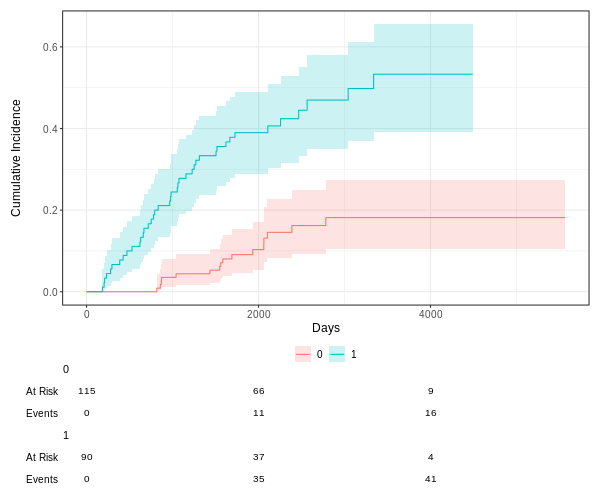

In [ ]:
%%R -h 500 -w 600 -u px
# Plot the cumulative incidence function (CIF)
tidycmprsk::cuminc(Surv(time, status) ~ ulcer, data = Melanoma) %>%
  ggcuminc() +
  labs(
    x = "Days"
  ) +
  add_confidence_interval() +
  add_risktable()

#### Fit a Fine-Gray Subdistribution Hazard Model

The **Fine-Gray model** is used to assess the effect of covariates on the subdistribution hazard, which accounts for competing risks. In this case, we’ll fit a Fine-Gray model to see how age, sex, and ulcer status impact the hazard of death from melanoma. The `crr()` function from the {tidycmprsk} package will estimate the subdistribution hazards.




In [ ]:
%%R
# Fit a Fine-Gray model for death from melanoma
fit.fg <- tidycmprsk::crr(Surv(time, status) ~ sex + age + ulcer, data = Melanoma)
# Display the model summary
fit.fg



── crr() ───────────────────────────────────────────────────────────────────────
• Call Surv(time, status) ~ sex + age + ulcer
• Failure type of interest "1"

Variable   Coef    SE      HR     95% CI       p-value    
sex        0.475   0.275   1.61   0.94, 2.75   0.084      
age        0.008   0.009   1.01   0.99, 1.03   0.37       
ulcer      1.34    0.290   3.81   2.16, 6.72   <0.001     


We can generate tables of formatted results using the `tbl_regression()` function from the {gtsummary} package, with the option exp = TRUE to obtain the hazard ratio estimates:

```{r}
tidycmprsk::crr(Surv(time, status) ~ sex + age + ulcer, data = Melanoma) %>%
  tbl_regression(exp = TRUE)
```
[Note: code only works in R]

-   **Cumulative Incidence Function (CIF)**: The plot shows how the probability of death from melanoma and death from other causes changes over time. The blue line represents the CIF for melanoma death, while the red line represents death from other causes.

-   **Fine-Gray Model**: The summary of the Fine-Gray model provides information on the effect of covariates (age, sex, ulcer status) on the subdistribution hazard of death from melanoma. The coefficients show how much the hazard of the event changes with each covariate.

In [ ]:
%%R
rm(list = ls())


### Risk Regression and model validation with {riskRegression} packages

The {riskRegression} package in R provides tools for survival analysis, particularly for competing risks and risk prediction modeling. This tutorial demonstrates how to perform a competing risks analysis with model model valiadtion with the Melanoma dataset, which is included in the {riskRegression} package and mostly followed the publication entitled [Overview of model validation for survival regression model with competing risks using melanoma study data](https://pmc.ncbi.nlm.nih.gov/articles/PMC6186983/) by Zhang et al., (2018).


#### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(prodlim)
library(survival)
library(cmprsk)
library(lava)
library(riskRegression)
library(tidyverse)
library(mstate)
library(regplot)

#### Data

We illustrate how to validate competing risks regression models using the `Melanoma` dataset included in the {riskRegression} package. This dataset comprises a cohort of 205 patients diagnosed with melanoma. By the end of the follow-up period, there were 134 survivors and 71 non-survivors.

The variable `time` represents the number of days after the operation, while the `status` variable indicates vital status, where 0 signifies censored (alive), 1 indicates death due to melanoma, and 2 represents death from other causes. Death from melanoma is our event of interest, while death from other causes is considered a competing event.

Additionally, there are seven predictors measured at the start of follow-up: `age`, `sex`, `tumor thickness (thick)`, `ulcer`, `invasion,` `inflammatory cell infiltration (ici)`, and `epicel`.

In [ ]:
%%R
data(Melanoma, package = "riskRegression")
glimpse(Melanoma)

Rows: 205
Columns: 11
$ time     <int> 10, 30, 35, 99, 185, 204, 210, 232, 232, 279, 295, 355, 386, …
$ status   <dbl> 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1…
$ event    <fct> death.other.causes, death.other.causes, censored, death.other…
$ invasion <fct> level.1, level.0, level.1, level.0, level.2, level.2, level.2…
$ ici      <fct> 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 2, 3, 2, 2, 3, 3, 3, 2…
$ epicel   <fct> present, not present, not present, not present, present, not …
$ ulcer    <fct> present, not present, not present, not present, present, pres…
$ thick    <dbl> 6.76, 0.65, 1.34, 2.90, 12.08, 4.84, 5.16, 12.88, 3.22, 7.41,…
$ sex      <fct> Male, Male, Male, Female, Male, Male, Male, Male, Female, Fem…
$ age      <int> 76, 56, 41, 71, 52, 28, 77, 49, 60, 68, 53, 64, 68, 63, 14, 7…
$ logthick <dbl> 1.9110229, -0.4307829, 0.2926696, 1.0647107, 2.4915512, 1.576…


#### Split the Data into Training and Testing Sets

The dataset is randomly split into training (80%) and testing (20%) datasets.

In [ ]:
%%R
# Set a seed for reproducibility
set.seed(123)
Melanoma$id<-1:nrow(Melanoma)
# Split data into training (80%) and testing (20%) sets
ind.split<-sample(1:nrow(Melanoma),
                  round(nrow(Melanoma)*4/5),
                  replace = F)

# Create training and testing datasets
dftrain <- Melanoma[ind.split, ]
dftest <- Melanoma[-ind.split, ]

#### Cause-specific hazard model versus Fine-Gray model

In thsi section we examine how covariates influence either the cause-specific hazard function or the cumulative incidence function (CIF) using the cause-specific hazards model or the **Fine-Gray (subdistribution hazard)** model. The cause-specific hazards model provides a hazard ratio that indicates the relative risk of an event given a covariate, but it cannot be directly applied to the cumulative incidence function, which is clinically relevant.

The **Fine-Gray** model addresses this issue by linking the cumulative incidence directly to the estimated subdistribution hazard, allowing regression coefficients to reflect the effects of covariates on cumulative incidence. However, the estimated subdistribution hazard ratio does not have a straightforward clinical interpretation, as it transforms the survival times of subjects who did not experience the event into artificially extended censored times, losing the probabilistic relationship with the marginal survival function.

***Cause-specific Cox proportional hazard regression***

The `CSC()` function is used to fit the cause-specific proportional hazards model, where the first vital status is used as a cause of interest by default. Alternatively, the cause argument can be used to specify a cause of interest.

-   CSC(formula, data, cause, surv.type = "hazard", fitter = "coxph", ...)

Below the `Hist()` function is similar to the `Surv()` function in the {survival} package, which provides functionality for managing censored event history response data

In [ ]:
%%R
csc<-CSC(Hist(time, status) ~  age + thick+ulcer, data = dftrain)
csc

CSC(formula = Hist(time, status) ~ age + thick + ulcer, data = dftrain)

Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


----------> Cause:  1 

Call:
coxph(formula = survival::Surv(time, status) ~ age + thick + 
    ulcer, x = TRUE, y = TRUE)

  n= 164, number of events= 46 

                 coef exp(coef) se(coef)     z Pr(>|z|)   
age          0.014982  1.015094 0.009234 1.622   0.1047   
thick        0.111032  1.117431 0.038580 2.878   0.0040 **
ulcerpresent 1.029264  2.799005 0.340378 3.024   0.0025 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
age              1.015     0.9851    0.9969     1.034
thick            1.117     0.8949    1.0361     1.205
ulcerpresent     2.799     0.3573    1.4364     5.454

Concordance= 0.74  (se = 0.03

***Fit the Fine-Gray Model***

`FGR()` function is an interface for fitting the Fine-Gray model and the arguments of the function are similar to that of the CSC() function.


In [ ]:
%%R
fgr<- FGR(Hist(time,status)~  age + thick+ulcer, data = dftrain, cause = 1)
fgr


Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


Fine-Gray model: analysis of cause 1 

Competing Risks Regression

Call:
FGR(formula = Hist(time, status) ~ age + thick + ulcer, data = dftrain, 
    cause = 1)

                coef exp(coef) se(coef)     z p-value
age          0.00711      1.01  0.00952 0.746  0.4600
thick        0.09711      1.10  0.03831 2.534  0.0110
ulcerpresent 0.97047      2.64  0.33874 2.865  0.0042

             exp(coef) exp(-coef)  2.5% 97.5%
age               1.01      0.993 0.989  1.03
thick             1.10      0.907 1.022  1.19
ulcerpresent      2.64      0.379 1.359  5.13

Num. cases = 164
Pseudo Log-likelihood = -210 
Pseudo likelihood ratio test = 23.6  on 3 df,

Convergence: TRUE 



A full model (fgr.full) is fitted by using the Fine-Gray model including all seven predictors:

In [ ]:
%%R
fgr.full<- FGR(Hist(time,status)~   age + thick+ulcer +ici+epicel+invasion+sex, data = dftrain, cause = 1)
fgr.full


Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


Fine-Gray model: analysis of cause 1 

Competing Risks Regression

Call:
FGR(formula = Hist(time, status) ~ age + thick + ulcer + ici + 
    epicel + invasion + sex, data = dftrain, cause = 1)

                   coef exp(coef) se(coef)      z p-value
age              0.0198     1.020   0.0112  1.769  0.0770
thick            0.0228     1.023   0.0656  0.348  0.7300
ulcerpresent     0.6646     1.944   0.3839  1.731  0.0830
ici1             1.6839     5.387   1.1001  1.531  0.1300
ici2             1.5758     4.835   1.0856  1.452  0.1500
ici3             1.5538     4.729   1.1442  1.358  0.1700
epicelpresent   -1.1913     0.304   0.4065 -2.931  0.0034
invasionlevel.1  0.5023     1.653   0.4149  1.211  0.2300
invasionlevel.2  0.9995     2.717   0.5774  1.731  0.0830
sexMa

#### Prediction

The `predict()` and `predictRisk()` function are similar that both of them estimate the absolute risk at specified time points. The difference is that the former returns covariates that have been used for prediction, whereas the latter only reports the absolute risk.

Following codes will provides the cumulative incidence functions for death from melanoma for the first five individuals in the test dataset over a period of 1,000 to 4,000 days post-operation. To visualize the absolute risk for each individual, you can use the `autoplot()` function.

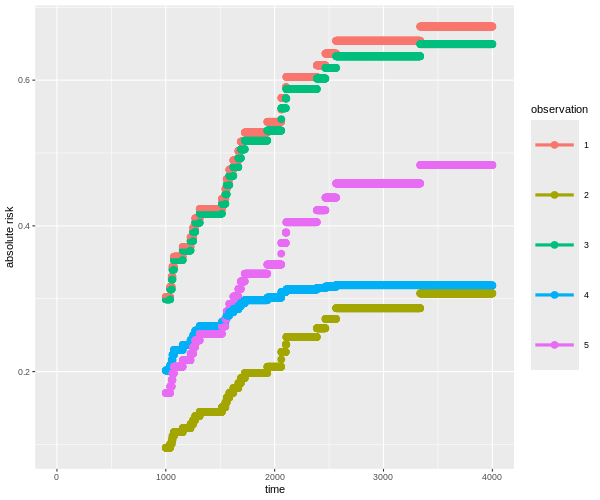

In [ ]:
%%R -h 500 -w 600 -u px
pred.csc<- predict(csc, newdata = dftest[1:5,], time = 1000:4000, cause = 1)
autoplot(pred.csc)

In [ ]:
%%R
predictRisk(csc, newdata=dftest[20,], times =2000)

          [,1]
[1,] 0.3436371


In [ ]:
%%R
predictRisk(fgr, newdata=dftest[20,], times =2000)

[1] "age"          "thick"        "ulcerpresent"
          [,1]
[1,] 0.3259236


For patient #20, the cumulative incidence estimates for death from melanoma over 2,000 days are 0.34 according to the cause-specific proportional hazards model and 0.32 according to the Fine-Gray model. The discrepancy between the cumulative incidence estimates from the Fine-Gray model and those from the cause-specific hazards models arises from differing assumptions about proportionality—specifically, the Fine-Gray model uses proportional subdistribution hazards, while the Cox regression models utilize proportional cause-specific hazards.

The `Score()` function provides a set of methods to score the predictive performance of risk prediction models.

In [ ]:
%%R
score<-Score(list(Cox_model = csc,
       Fine_Gray=fgr,
       Full_Fine_Gray =fgr.full),
                       formula = Hist(time, status) ~ 1,
                       data = dftest,
                       times =  seq(2000, 4000, 500),
       plots=c("calibration","ROC"))

[1] "age"          "thick"        "ulcerpresent"
 [1] "age"             "thick"           "ulcerpresent"    "ici1"           
 [5] "ici2"            "ici3"            "epicelpresent"   "invasionlevel.1"
 [9] "invasionlevel.2" "sexMale"        


The `plotCalibration()` function draws a calibration plot:

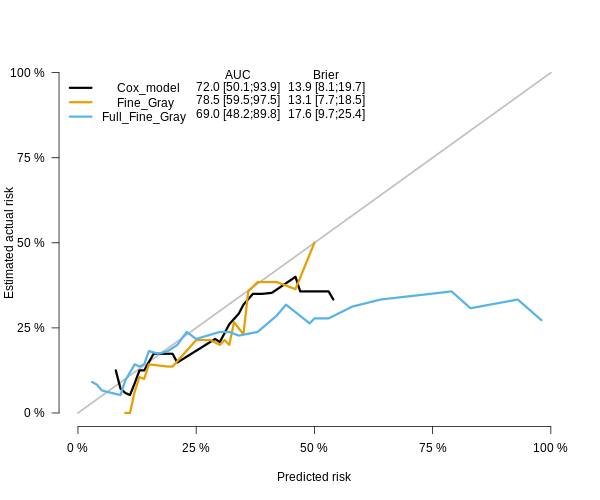

In [ ]:
%%R -h 500 -w 600 -u px
plotCalibration(score, times =2000, cens.method="jackknife" )

A calibration curve in above figure that is close to the diagonal indicates a better model. The `area under the operating characteristic curve (AUC)` and the `Brier score` are shown at the top of the figure. The `AUC`, also called the `C-index`, measures how well the model can differentiate between outcomes. An `AUC`greater than 0.8 suggests good accuracy.

The `Brier score` measures both how well the model predicts outcomes and how well it is calibrated. It calculates the average squared difference between the actual outcome and the predicted probability. A smaller Brier score means a better model. In our case, the full model has the smallest `AUC` and the largest `Brier` score, indicating it performs poorly.

#### Calibration with cross validation method

A single split into training and test datasets may fail to address the uncertainty of model predictions. Therefore, it's essential to use all available data for both model training and validation. This is why we utilize the cross-validation method. A commonly used approach is `k-fold cross-validation`, which has also been applied to competing risks regression models.

In `k-fold cross-validation`, the original dataset is randomly partitioned into k equal-sized subsamples. One of these $k$ subsamples is reserved as the validation data for testing the model, while the remaining $k−1$ subsamples are used as training data. This process is repeated $k$ times, ensuring that each subsample is used once as the validation data. The results from the k iterations can then be averaged to produce a single estimation. The prediction accuracy can be measured using indices such as the `Area Under the Curve (AUC)` or the `Brier score`.

However, unlike the one-time split method, cross-validation produces $k$ models. The question then arises: which model should be used for prediction? The purpose of cross-validation is not to identify a final model; rather, it serves as a means of model checking to improve prediction accuracy. We do not use the k trained models for actual predictions; instead, we aim to utilize all available data to develop the best possible model.

Cross-validation facilitates the comparison of different model specifications. For example, if we have linear regression models with and without interaction terms, cross-validation can indicate which model performs better in terms of prediction. Once identified, we can train that preferred model using the entire dataset. It's worth noting that while the covariate effects in the linear models may differ across training iterations, the model specification remains consistent. Alternatively, cross-validation can also be employed to build an ensemble model.

In [ ]:
%%R
fgr1<- FGR(Hist(time,status)~   age + thick+ulcer, data =Melanoma, cause = 1)
score.cv<-Score(list(
                       Fine_Gray=fgr1),
                       formula = Hist(time, status) ~ 1,
                       data = Melanoma,
                       times =  seq(2000, 4000, 500),
                       split.method = "bootcv",
                       B=10,
                       plots=c("calibration","ROC"))

  |                    |   0%


Attaching package: ‘data.table’



    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



    between, first, last



    transpose




  |==                  |  10%[1] "age"          "thick"        "ulcerpresent"
  |====                |  20%[1] "age"          "thick"        "ulcerpresent"
  |======              |  30%[1] "age"          "thick"        "ulcerpresent"
  |========            |  40%[1] "age"          "thick"        "ulcerpresent"
  |==========          |  50%[1] "age"          "thick"        "ulcerpresent"
  |============        |  60%[1] "age"          "thick"        "ulcerpresent"
  |==============      |  70%[1] "age"          "thick"        "ulcerpresent"
  |================    |  80%[1] "age"          "thick"        "ulcerpresent"
  |==================  |  90%[1] "age"          "thick"        "ulcerpresent"
  |====================| 100%[1] "age"          "thick"        "ulcerpresent"

  |                    |   0%

  |====================| 100%


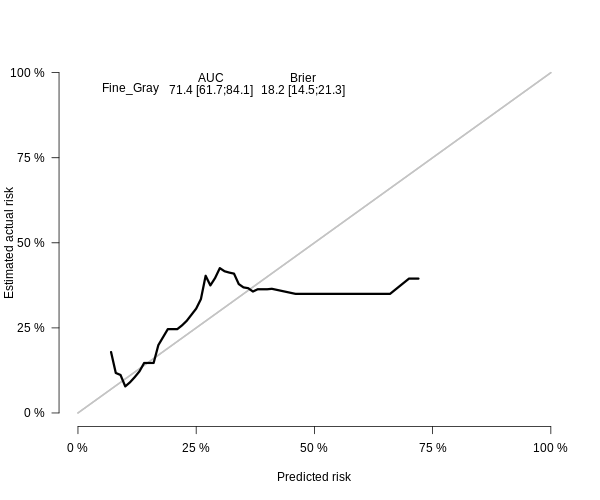

In [ ]:
%%R -h 500 -w 600 -u px
plotCalibration(score.cv, times =2000, cens.method="jackknife")

#### Bandwidth selection

A smoothed calibration curve can be generated using various smoothing techniques, each of which is influenced by the selection of a bandwidth parameter. The calibration curve's appearance is heavily dependent on this choice. When a larger bandwidth is used, the resulting curve tends to be smooth and flat, leading to greater bias but reduced variance. Conversely, a smaller bandwidth can produce a curve with noticeable fluctuations, which results in lower bias but higher variance. As such, selecting the right bandwidth involves carefully balancing these opposing factors—bias and variance. The following code illustrates how to create calibration curves with varying bandwidths to observe these effects in action.

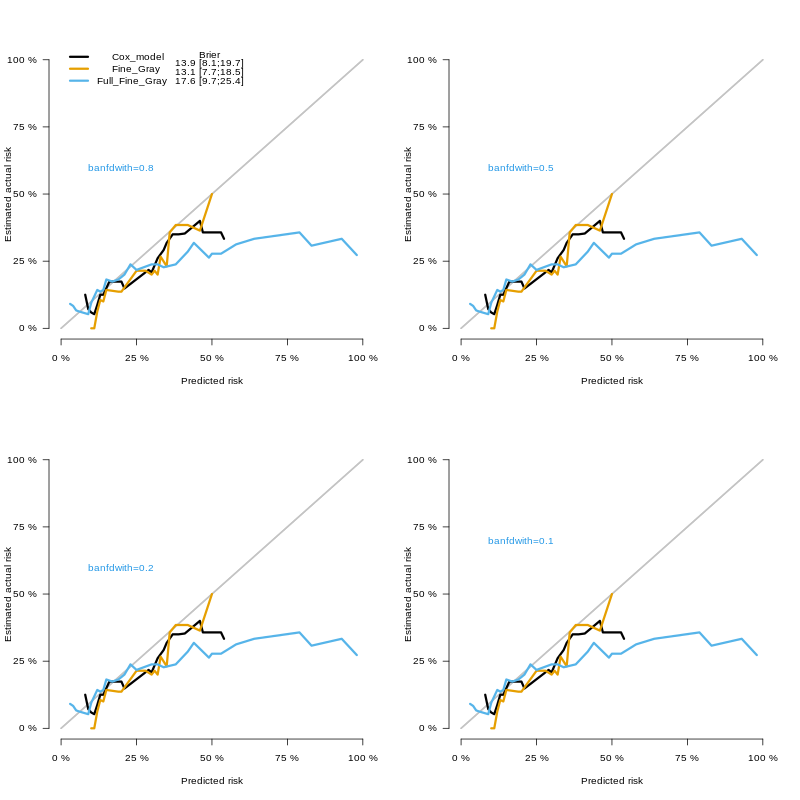

In [ ]:
%%R -h 800 -w 800 -u px
par(mfrow =c(2,2))
plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.8,
                auc.in.legend=F,
                cens.method="jackknife",
                btier.in.legend = F,
                legend.x =0, legend.y =1.1)
text(x=0.2, y=0.6, "banfdwith=0.8", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.5,
                cens.method="jackknife",
                legend = F)
text(x=0.2, y=0.6, "banfdwith=0.5", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.2,
                cens.method="jackknife",
                legend=F)
text(x=0.2, y=0.6, "banfdwith=0.2", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.1,
                cens.method="jackknife",
                legend=F)
text(x=0.2, y=0.7, "banfdwith=0.1", col =4)


#### Plotting AUC and Brier score

The `Score`()` function calculates all these scores over time and we can easily extract the results for further graphical display.

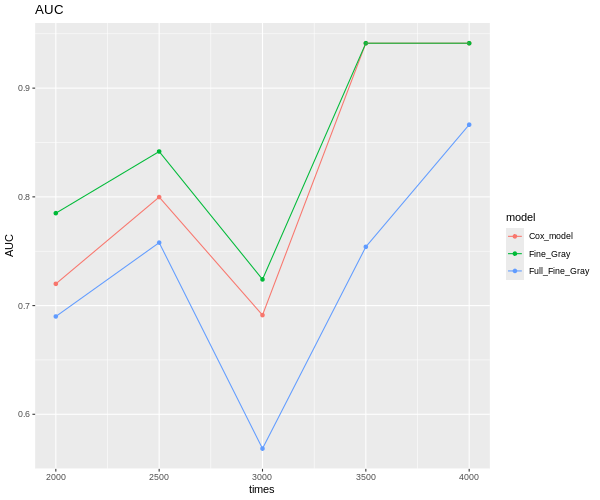

In [ ]:
%%R -h 500 -w 600 -u px
ggplot(data=score$AUC$score, aes(x=times, y = AUC, color = model)) +
  geom_point() +
  geom_line() +
  ggtitle("AUC")

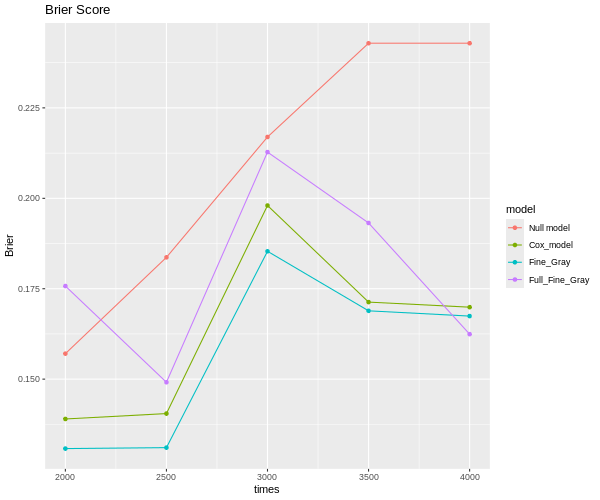

In [ ]:
%%R -h 500 -w 600 -u px
ggplot(data=score$Brier$score, aes(x=times, y = Brier, color = model)) +
  geom_point() +
  geom_line() +
  ggtitle("Brier Score")

#### Nomogram for visualizing regression models

A **nomogram** is a graphical tool often used in medical and clinical research to predict the probability of a certain outcome or event, such as survival or disease recurrence, based on multiple predictors or covariates. Nomograms provide a visual representation of complex predictive models, making them easier to interpret and apply in a clinical setting.

The `regplot()` function is useful for plotting nomograms with attractive aesthetics. However, it only accepts objects returned by the `coxph`, `lm`, and `glm` functions. To create a nomogram when dealing with competing risks, we first need to construct a weighted dataset for competing risks analysis. We will use `crprep()` function of {mstate} package.  This allows us to fit the competing risk model using the `coxph()` function, which can then be passed to `regplot()` to generate the nomogram.

In [ ]:
%%R
# created a weighted data set
df.w<-crprep("time", "status",
             data =dftrain, trains=c(1,2),
             cens=0, id="id",
             keep =c("age", "thick", "ulcer"))
head(df.w)

   id Tstart Tstop status weight.cens age thick       ulcer count failcode
1 159      0  3152      0           1  32  1.62 not present     1        1
2 179      0  3459      0           1  29  0.65 not present     1        1
3  14      0   426      1           1  63  4.84     present     1        1
4 195      0  4119      0           1  52  0.65 not present     1        1
5 170      0  3330      0           1  61  0.81     present     1        1
6  50      0  1512      0           1  77  0.16 not present     1        1


In [ ]:
%%R
df.w$T<-df.w$Tstop-df.w$Tstart

In [ ]:
%%R
# Fine-Gray model is performed with the coxph() function.
f.crr<-coxph(Surv(T, status==1) ~ age + thick + ulcer,
       data = df.w,
       weight = weight.cens,
       subset =failcode ==1)

In [ ]:
%%R -h 800 -w 800 -u px
# plot namogram
regplot(f.crr,
        observation = df.w[df.w$id&df.w$failcode==1,],
        failtime= c(2000, 3000),
        prfail=T,
        points=TRUE,
        droplines=T)

[[1]]
             ulcer Points
ulcer1 not present     25
ulcer2     present     66

[[2]]
   thick Points
1      0     13
2      2     23
3      4     33
4      6     43
5      8     53
6     10     63
7     12     73
8     14     83
9     16     93
10    18    103

[[3]]
  age Points
1   0     -2
2  20      6
3  40     15
4  60     23
5  80     31

[[4]]
   Total Points Pr( T < 2000 )
1            20         0.0425
2            40         0.0672
3            60         0.1053
4            80         0.1630
5           100         0.2477
6           120         0.3658
7           140         0.5174
8           160         0.6882
9           180         0.8450
10          200         0.9493
11          220         0.9915



## Summary and Conclusion:

## Summary and Conclusions

The `tidycmprsk` package is an innovative tool designed for conducting risk regression and analyzing competing risks while adhering to a tidy framework, which simplifies data manipulation and visualization. In our analysis, we utilized the Melanoma dataset, a valuable resource for studying outcomes related to skin cancer.

First, we calculated the `Cumulative Incidence Function (CIF)`, which quantifies the probability of different types of events (in this case, death due to melanoma and other causes) over time. This step is crucial for understanding the competing risks involved, as it allows us to see how the likelihood of each event changes as time progresses. Following this, we fitted a **Fine-Gray** subdistribution hazard model. This model is particularly beneficial as it enables us to assess the impact of various covariates—such as age, gender, treatment type, and other relevant factors—on the subdistribution hazard of the event of interest (i.e., melanoma-related death). The results from this model provide insights into how these covariates influence the risks over time.

The visualization of the CIF is represented through plots that clearly illustrate the evolution of risks associated with melanoma and other causes of death. These plots are essential for interpreting the data and communicating the findings effectively.

Furthermore, we explored the `riskRegression` package in R, which offers extensive capabilities for conducting thorough risk analyses and competing risks modeling, complete with validation features. Again, we worked with the Melanoma dataset to estimate the `Cumulative Incidence Function (CIF)` and fitted a Cause-Specific Hazard model to investigate the relationships between different hazards. This model helps isolate the risk factors specifically related to melanoma-related death, providing a more focused understanding of the hazard structure.

Additionally, we applied the Fine-Gray model within the `riskRegression` framework to further scrutinize how covariates affect subdistribution hazards. The analyses generated by these models yield comprehensive insights into the relative risks of death from melanoma compared to other causes of mortality, enhancing our understanding of patient outcomes over time. The detailed results and accompanying visualizations serve as powerful tools for clinicians and researchers aiming to understand the complexities of competing risks in the context of melanoma..


## References

1.  [Survival Analysis with R](https://www.emilyzabor.com/tutorials/survival_analysis_in_r_tutorial.html#Part_2:_Landmark_Analysis_and_Time_Dependent_Covariates)

2.  [Analyzing Competing Risk Data Using the R timereg Package](https://pmc.ncbi.nlm.nih.gov/articles/PMC3375021/)

3.  [Overview of model validation for survival regression model with competing risks using melanoma study data](https://pmc.ncbi.nlm.nih.gov/articles/PMC6186983/)

4.  [Competing risks regression](https://argoshare.is.ed.ac.uk/healthyr_book/competing-risks-regression.html)
